# Datas 

- Source for airports locations: https://openflights.org/data.html (file airlines.dat)
- Source for american airlines and flight scedules: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236


In [1]:
from visuMultiStream import *
print("1")
from intervals import *
print("2")
from structure import *
print("3")
from elemMSGraph import *
print("4")
from multiLayers import *
print("5")
from sortedcollection import *
print("6")
from matrices import *
print("7")
from random import *
print("8")
import seaborn as sns
print("9")

from tulip import tlp
print("10")
import scipy.linalg
print("finished")

sorted collection imported
1
2
3
4
5
6
7
8
9
10
finished


Echelle de temps : 1 mois

In [2]:
t0=0
tend=24*60*31

print(tend)

interval=Interval(t0,tend)

44640


In [3]:
def convertToMinutes(day,hour,minutes):
    return((day-1)*24*60+hour*60+minutes)



def readAirports(airportl):
    dicoAir={}
    f=open("planes/airports.dat","r",encoding="utf8")
    #print(f)
    lste=[]
    for line in f:
        line=line.replace("\"",'')
        tab=line.split(",")
        ida=tab[4]
        namea=tab[1]
        country=tab[3]
        print(ida)
        if (ida in dicoAir)==False and (ida in airportl):
            lat=tab[6]
            long=tab[7]
            print("oui")
            dicoAir[ida]=[namea,lat,long]
            lste.append(NodeT(ida,IntervalList([interval])))
    return(dicoAir,lste)
    

def readLinks():
    f=open("planes/jan2010.csv",'r')
    n=0
    em=LinkList([])
    careersl=[]
    airportl=[]
    airportPerLay={}
    for line in f:
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            date=int(tab[0].split("-")[2])
            career=tab[1]
            origin=tab[2]
            dest=tab[3]
            dept=int(tab[4][0]+tab[4][1])*60+int(tab[4][2]+tab[4][3])
            if len(tab[5])>0:
                arrival=int(tab[6][0]+tab[6][1])*60+int(tab[6][2]+tab[6][3])
                inter=Interval((date-1)*24*60+dept,(date-1)*24*60+arrival)
                if arrival<=dept:
                    inter=Interval((date-1)*24*60+dept,(date)*24*60+arrival)
                if not (career in careersl):
                    careersl.append(career)
                if not (origin in airportl):
                    airportl.append(origin)
                if not (dest in airportl):
                    airportl.append(dest)
                if (career in airportPerLay.keys())==False:
                    airportPerLay[career]=[]
                if not origin in airportPerLay[career]:
                    airportPerLay[career].append(origin)
                if not dest in airportPerLay[career]:
                    airportPerLay[career].append(dest)
                em.addLink(Link(IntervalList([inter]),NodeT(origin,IntervalList([interval])),[career],NodeT(dest,IntervalList([interval])),[career],directed=1),cond=0)
        n=n+1
    f.close()
    return(em,sorted(careersl),sorted(airportl),airportPerLay)

    
def readCarriers(carL):
    f=open("planes/L_UNIQUE_CARRIERS.csv","r")
    n=0
    liste=[]
    dicoCarreer={}
    for line in f :
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            tab[-1]=tab[-1].rstrip("\n")
            code=tab[0]
            name=tab[1]
            if (code in liste) == False and (code in carL)==True :
                liste.append(code)
                dicoCarreer[code]=name
        n=n+1
    comp=Aspect("carrier",liste)
    return(comp,dicoCarreer)

# Principe :

In the datasets, they are to many airports and carriers (not american and unused). So we begin to read the links to know which airports and carriers are used and we then read their datasets to collect their detailed informations (stored into dictionnaries)

In [4]:
em,carL,airportl,airportperlay=readLinks()

dicoAir,nodes=readAirports(airportl)

laystr=LayerStruct([Aspect("compagnies",carL)])
listLay=[]

carriers,dicoCarreer =readCarriers(carL)

for l in carriers.giveElemLayer():
    nl=NodeTList([])
    for no in airportperlay[l]:
        nl.addNodeT(NodeT(no,IntervalList([interval])))
    listLay.append(Layer(laystr,[l],interval,nl))

layers=LayerList(listLay)

m=MultiStream(interval,laystr,layers,em,nodes=airportl)          

multi=m.extractML()

GKA
MAG
HGU
LAE
POM
WWK
UAK
GOH
SFJ
THU
AEY
EGS
HFN
HZK
IFJ
KEF
PFJ
RKV
SIJ
VEY
YAM
\N
\N
YAY
YAZ
YBB
YBC
YBG
YBK
YBL
YBR
YCB
YCD
YCG
YCH
YCL
YCO
YCT
YCW
YCY
YZS
YDA
YDB
\N
YDF
YDL
YDN
YDQ
YEG
YEK
YEN
YET
YEU
YEV
YFB
YFC
YFE
YFO
YFR
YFS
YGK
YGL
YGP
YGQ
YGR
YHB
YHD
YHI
YHK
YHM
YHU
YHY
YHZ
YIB
YIO
YJN
YJT
YKA
YKF
YKL
YKY
YKZ
YLD
YLJ
YLL
YLT
YLW
YMA
YMJ
YMM
YMO
YMW
YMX
YNA
YND
YNM
YOC
YOD
YOJ
YOW
YPA
YPE
YPG
\N
YPL
YPN
YPQ
YPR
YPY
YQA
YQB
YQF
YQG
YQH
YQK
YQL
YQM
YQQ
YQR
YQT
YQU
YQV
YQW
YQX
YQY
YQZ
YRB
YRI
YRJ
YRM
YRT
YSB
YSC
YSJ
YSM
YSR
YSU
YSY
YTE
YTH
YTR
YTS
YTZ
YUB
YUL
YUT
YUX
YUY
YVC
YVG
YVM
YVO
YVP
YVQ
YVR
YVT
YVV
YWA
YWG
YWK
YWL
YWY
YXC
YXD
YXE
YXH
YXJ
YXL
YXP
YXR
YXS
YXT
YXU
YXX
YXY
YYB
YYC
YYD
YYE
YYF
YYG
YYH
YYJ
YYL
YYN
YYQ
YYR
YYT
YYU
YYW
YYY
YYZ
YZD
YZE
YZF
YZH
YZP
YZR
YZT
YZU
YZV
YZW
YZX
ZFA
ZFM
QLD
BUJ
BJA
ALG
DJG
\N
\N
VVZ
\N
TMR
GJL
MZW
\N
AAE
CZL
TEE
HRM
TID
\N
TIN
CFK
TAF
TLM
ORN
BFW
MUW
AZR
BSK
ELG
GHA
HME
INZ
TGR
LOO
TMX
OGX
IAM
COO
OUA
BOY
ACC
TML
\N
NYI
TKD
ABJ
BYK
DJ

OYP
\N
AOP
\N
IBP
PCL
CHM
\N
\N
CIX
AYP
ANS
ATA
LIM
JJI
JAU
JUL
ILQ
\N
TBP
YMS
\N
CHH
IQT
AQP
\N
TRU
PIO
TPP
TCQ
PEM
PIU
TYL
CUZ
\N
DZO
MVD
STY
AGV
AAO
\N
BLA
BNS
\N
BRM
CBL
CXA
\N
CLZ
CAJ
VCR
CUP
CZE
\N
CUM
\N
EOR
EOZ
GDO
GUI
GUQ
HGE
ICC
LSP
\N
LFR
\N
MAR
MRD
PMV
CCS
MUN
PYH
PBL
SCI
PZO
PTM
SVZ
SBB
SNV
STD
SNF
SFD
SOM
STB
TUV
TMO
VLN
VLV
VDP
\N
LTM
ANU
BGI
DCF
DOM
FDF
SFG
PTP
GND
STT
oui
STX
oui
BQN
oui
FAJ
SIG
MAZ
PSE
oui
SJU
oui
SKB
SLU
UVF
AUA
BON
CUR
EUX
SXM
AXA
TAB
POS
EIS
CIW
MQS
SVD
ALA
BXH
TSE
DMB
FRU
OSS
CIT
URA
PWQ
PLX
AKX
GYD
YKS
MJZ
BQS
KHV
PVS
GDX
PWE
PKC
UUS
VVO
HTA
BTK
IKT
UUD
KBP
DOK
DNK
SIP
IEV
LWO
ODS
LED
MMK
GME
VTB
KGD
MHP
MSQ
ABA
BAX
KEJ
OMS
KRR
MCX
MRV
STW
ROV
AER
ASF
VOG
CEK
MQF
NJC
PEE
SGC
SVX
ASB
KRW
CRZ
DYU
BHK
SKD
TAS
BZK
SVO
KLD
VOZ
VKO
SCW
KZN
REN
UFA
KUF
AMD
AKD
IXU
BOM
PAB
BHJ
IXG
BDQ
BHO
BHU
NMB
\N
GUX
GOI
IDR
JLR
JGA
IXY
HJR
KLH
IXK
NAG
ISK
PNQ
PBD
RAJ
RPR
SSE
STV
UDR
CMB
ACJ
BTC
RML
ADP
JAF
TRR
KZC
PNH
REP
TNX
IXV
IXA
AJL
IXB
\N
BBI
CCU
COH
DBD
GAY
\N

ULO
\N
LBX
TJU
CMJ
TAZ
BWB
DRB
WGE
BRT
DKI
LZR
HLT
HCQ
FIZ
RVT
\N
PVU
SBS
DTA
\N
PUC
LAM
HII
INW
DGL
MZK
AEA
AAK
KUC
AIS
TMN
BEZ
NIG
BBG
MTK
MNK
NON
TSU
WTZ
KTF
AFT
RNA
CHY
NNB
XYA
BPF
BOW
\N
FTI
LVK
RMY
GFY
NDU
\N
TRM
SMO
UDD
SCF
OLM
\N
RIL
SAA
PDK
BMG
SUA
MMU
APC
SDM
\N
VNC
PHK
ECP
SBD
VAL
CAU
AWK
QNV
SQL
\N
\N
\N
RWI
\N
SXQ
SEE
\N
PHA
SQH
TKF
FRJ
GEX
\N
\N
\N
\N
\N
LVM
\N
\N
\N
\N
\N
\N
\N
GMV
\N
JRA
\N
\N
LAL
\N
SYH
\N
\N
RBK
FNU
\N
MYQ
\N
MGY
\N
FDY
\N
PEA
\N
EMP
\N
HYC
BBP
\N
SPF
\N
\N
QYD
\N
\N
\N
\N
OLV
KNA
\N
ONQ
BJC
SLE
UTM
\N
ZKB
LND
\N
\N
\N
\N
\N
MWC
JVL
\N
\N
LZU
BWG
RVS
NHD
KGO
\N
DBB
BCE
\N
CKL
TCZ
UKS
\N
OAZ
JCI
ESN
HMR
\N
MYV
\N
DUC
UVA
LOT
CCR
OCA
\N
\N
YUS
HIA
YOO
\N
\N
LHA
NYW
ATO
SGH
\N
\N
HEX
CDA
JAB
\N
HGS
TOP
\N
\N
MQY
UOS
NGQ
CSO
\N
PWK
KLS
\N
\N
ZTA
\N
\N
PUE
KHC
UKA
ILN
AVW
CGZ
\N
BXK
\N
MMI
STK
RWL
\N
CDW
AIZ
TVI
HSH
GML
TMA
\N
\N
RDO
DVT
\N
\N
YRV
FRG
\N
\N
\N
\N
ZHY
MCL
\N
PPC
KHW
\N
TXG
HLG
\N
XYE
\N
\N
DWC
RKP
MVV
MFX
AEB
OKF
OKU
\N
\N
\N
\N
\N
\N
\N
\N

In [5]:
m2=m.cut(Interval(0,24*60))
m2=m2.extractLayers([["G4"]])
m2.drawMS("avions1988.fig")

In [6]:
print(dicoAir)

{'STT': ['Cyril E. King Airport', '18.337299346923828', '-64.97339630126953'], 'STX': ['Henry E Rohlsen Airport', '17.701900482177734', '-64.79859924316406'], 'BQN': ['Rafael Hernandez Airport', '18.49489974975586', '-67.12940216064453'], 'PSE': ['Mercedita Airport', '18.00830078125', '-66.56300354003906'], 'SJU': ['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371'], 'ITO': ['Hilo International Airport', '19.721399307250977', '-155.04800415039062'], 'FSM': ['Fort Smith Regional Airport', '35.33660125732422', '-94.36740112304688'], 'GFK': ['Grand Forks International Airport', '47.949299', '-97.176102'], 'BOS': ['General Edward Lawrence Logan International Airport', '42.36429977', '-71.00520325'], 'OAK': ['Metropolitan Oakland International Airport', '37.721298', '-122.221001'], 'OMA': ['Eppley Airfield', '41.3032', '-95.894096'], 'OGG': ['Kahului Airport', '20.8986', '-156.429993'], 'ICT': ['Wichita Eisenhower National Airport', '37.649899', '-97.433098'], 'MCI'

## Build the tulip file

The differents layers corresponding to the different carriers are drawn in different colors. We build different subgraphs corresponding to each company.

This is very useful for vizualisation (download tulip http://tulip.labri.fr/TulipDrupal/ ) to open the graph (double click on the graph on the bottom left and chose the "geographic view"

In [7]:
def makeGraph(m,airportl,carL,dicoAir,airportperlay):
    graph=tlp.newGraph()
    latitude=graph.getDoubleProperty("latitude")
    longitude=graph.getDoubleProperty("longitude")
    name = graph.getStringProperty("nameCity")
    code = graph.getStringProperty("code")
    couche = graph.getStringVectorProperty("compagnie")
    color = graph.getColorProperty("viewColor")
    k=len(carL)
    colList=[(randint(0,255),randint(0,255),randint(0,255)) for i in range(k)]
    for n in range(len(airportl)):
        graph.addNode()
        no=graph.nodes()[n]
        code[no]=airportl[n]
        listeAttributs=dicoAir[airportl[n]]
        name[no]=listeAttributs[0]
        latitude[no]=float(listeAttributs[1])
        longitude[no]=float(listeAttributs[2])
    n=0
    for lay in m.giveLayers().giveLayers():
        car=lay.giveLayerLabel()[0]
        sub=graph.addSubGraph(car)
        nliste=airportperlay[car]
        for node1 in nliste :
            no=graph.nodes()[airportl.index(node1)]
            sub.addNode(no)
        #print(car,len(sub.nodes()))
    for e in m.giveLinks().giveListOfLinks():
        n1=graph.nodes()[airportl.index(e.giveNodes()[0].giveNode())]
        n2=graph.nodes()[airportl.index(e.giveNodes()[1].giveNode())]
        graph.addEdge(n1,n2)
        ed=graph.edges()[n]
        n=n+1
        couche[ed]=e.giveLabel()[2]
        color[ed]=colList[carL.index(e.giveLabel()[2][0])]
        sub=graph.subGraphs()[carL.index(e.giveLabel()[2][0])]
        car=e.giveLabel()[2][0]
        codenode=e.giveNodes()[0].giveNode()
        n1=sub.nodes()[airportperlay[car].index(codenode)]
        n2=sub.nodes()[airportperlay[e.giveLabel()[2][0]].index(e.giveNodes()[1].giveNode())]
        sub.addEdge(ed)
    tlp.saveGraph(graph,"grapheplanes2010.tlp")
    return(graph)

graph=makeGraph(m,airportl,carL,dicoAir,airportperlay)

We can then use the library "tulip" to compute classical measures: 

- page ranking: 

In [8]:
pagerank=graph.getDoubleProperty("pageRank")
params = tlp.getDefaultPluginParameters('Page Rank', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Page Rank', pagerank, params)
pr=[]
for n in graph.getNodes():
    pr.append(pagerank[n])

- betweenness centrality:

In [9]:
betweenness=graph.getDoubleProperty("betweeness")
params = tlp.getDefaultPluginParameters('Betweenness Centrality', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Betweenness Centrality', betweenness, params)
bt=[]
for n in graph.getNodes():
    bt.append(betweenness[n]) 

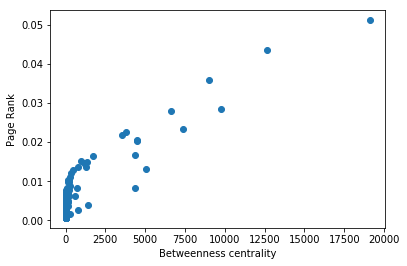

In [10]:
axes = plt.gca()
plt.plot(bt,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('Betweenness centrality')
plt.savefig("prVSbc.pdf")
plt.show()


# Intrication

We compute the Burt's matrix which is:

$\begin{pmatrix}
P(1) & P(1|2) & P(1|3) & \dots & P(1|n)\\
P(2|1) & P(2) & P(2|3) & \dots & P(2|n)\\
\vdots & \vdots & \ddots\\
\dots & \dots & \dots & \dots & P(n)
\end{pmatrix}$

$P(i)$ is the probability, taking a flight, that it exists in the compagny $C_i$.

$P(i|j)$ is the probability, taking a flight in $c_j$, that $c_i$ has the same flight.

In [11]:
matintric=multi.computeIntricationMatrixBurt()

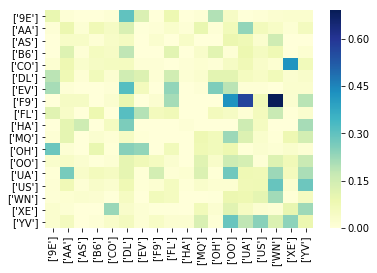

In [12]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matintric),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("intricplanes.pdf")
plt.show()


We compute its maximal left eigenvalue and the eigenvector associated. If the matrix isn't reductible (if we have all the nodes in the same connex component), this eigenvalue is unique and the eigenvector has all its coefficients of the same sign.

In [13]:
valp,vectp=valeurPropreMax(np.transpose(matintric),1000)

We draw the eigenvector ordered:

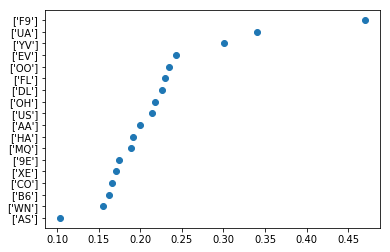

In [14]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectp[lablist.index(lab)])
vectpo,labo=l.listsSorted()

plt.plot(labo,vectpo,'o')
plt.savefig("intricscoresplanes.pdf")
plt.show()

 # Covariance

In [15]:
matcov=multi.computeCovariance()

N= 2062


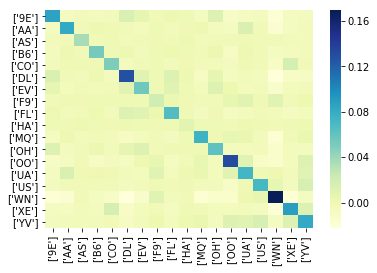

In [16]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcov),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [17]:
valpcov,vectpcov=valeurPropreMax(np.transpose(matcov),1000)
print(valpcov)

0.19526429704721163


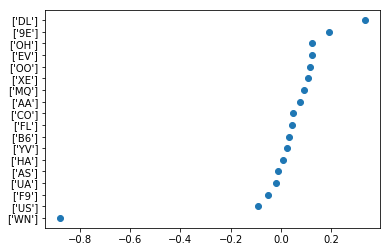

0.19526429704721163


In [18]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpcov[lablist.index(lab)])
vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("covscoresplanes.pdf")
plt.show()

print(valpcov)

## Test: covariance valeur propre minimale

In [19]:
vp,vectpro=np.linalg.eig(matcov)

taux=[matintric[i][i] for i in range(len(matcov))]

print(vp,vectpro)

for i in range(len(vectpro)):
    esp=0
    for j in range(len(vectpro[i])):
        esp=esp+vectpro[i][j]*taux[j]
    print("esp",esp, "lambda", vp[i])
    
esp_glob=0
for i in range(len(taux)):
    esp_glob=esp_glob+taux[i]
print("esperance globale=",esp_glob)
print("variance globale = ", )

[0.1952643  0.15943777 0.12973022 0.00886946 0.01684691 0.10450901
 0.09719196 0.02884473 0.08736607 0.0407632  0.0411341  0.04645012
 0.07671392 0.07407974 0.05317774 0.05735684 0.06013359 0.06593479] [[-1.90196847e-01  2.63489869e-01 -5.00193392e-02  2.48765981e-02
  -1.73117588e-02 -3.08634368e-01 -2.81619450e-01  2.13742334e-01
   3.54970163e-01 -9.39081326e-02  1.01280904e-01  1.83509414e-01
   5.92860618e-01  1.38293403e-01 -4.18236047e-02 -1.46411980e-01
  -3.13119338e-01 -1.15342475e-02]
 [-7.62700893e-02 -3.58771235e-02  1.51693182e-01  1.48910504e-02
   1.54683724e-02  6.57390576e-01 -1.61745139e-01  2.01729986e-01
  -1.43385663e-01 -1.57283668e-03  4.14469199e-02  1.74967140e-01
   2.60315942e-01 -1.75461468e-01 -1.26328348e-01  4.92785144e-01
  -2.12328549e-01 -1.22805441e-01]
 [ 1.07347033e-02 -4.10577011e-03  2.08737771e-02 -2.08047778e-02
  -4.72605532e-02  1.39405252e-02 -5.59164813e-02  7.48754230e-01
  -3.75021140e-02  2.29871969e-01 -3.41562765e-01 -4.72221725e-01
  

## Tests precision

In [20]:
matprec=np.linalg.inv(matcov)
#for i in range(len(matprec)):
#    matprec[i][i]=0

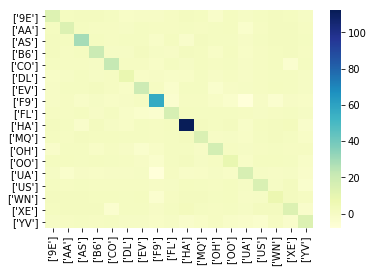

In [21]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matprec),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [22]:
valpprec,vectpprec=valeurPropreMax(np.transpose(matprec),1000)
print(1/valpprec)

0.008869459392863072


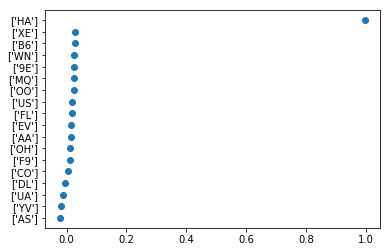

112.74644323921966


In [23]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpprec[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpprec)

## Next VP

["['9E']", "['AA']", "['AS']", "['B6']", "['CO']", "['DL']", "['EV']", "['F9']", "['FL']", "['HA']", "['MQ']", "['OH']", "['OO']", "['UA']", "['US']", "['WN']", "['XE']", "['YV']"]


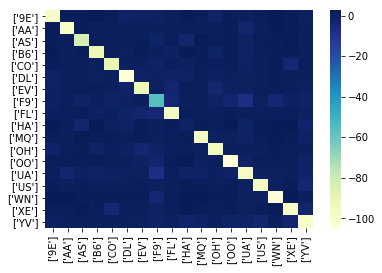

In [24]:
matprec2=matprec-valpprec*np.eye(18)

lablist=multi.giveLayersLabels()
print(lablist)
sns_plot=sns.heatmap(np.transpose(matprec2),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()


In [25]:
valpp2,vectpp2=valeurPropreMax(np.transpose(matprec2),1000)

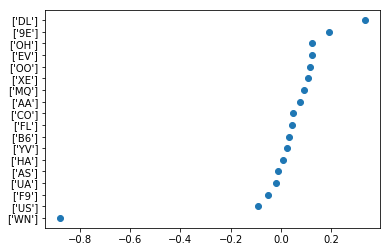

220.37162255482536


In [26]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpp2[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
#plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpp2+valpprec)

# Random walks

A step: to go on, a passenger will chose among all the possibles links he can take. Each link corresponds to a company and a destination.

For instance, from `['Montgomery Regional (Dannelly Field) Airport', '32.30059814', '-86.39399719']`
we can reach with the same probability:
```
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with Endeavor Air Inc.
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with SkyWest Airlines Inc.
['Ronald Reagan Washington National Airport', '38.8521', '-77.037697'] with PSA Airlines Inc.
['Dallas Fort Worth International Airport', '32.896801', '-97.038002'] with Envoy Air
```


In [27]:
def step(pos0,airportl,m,t,prints=False):
    if prints==True:
        print(dicoAir[pos0])
    bloque=False
    possibleDest={}
    listDest=[]
    car="none"
    for link in m.giveLinks().giveListOfLinks():
        if link.giveNodes()[0].giveNode()==pos0:
            dest=link.giveNodes()[1].giveNode()
            if not dest in listDest:
                listDest.append(dest)
                possibleDest[dest]=[]
            possibleDest[dest].append(link)
            #print(link.giveLabel())
            #print(dicoAir[(link.giveLabel()[1])],dicoCarreer[link.giveLabel()[2][0]])
    if len(listDest)==0:
        bloque=True
        pos1=pos0
        print("no neighbours")
        t1=t
    else:
        #print("----------------------------")
        li=randint(0,len(listDest)-1)
        operListe=possibleDest[listDest[li]]
        link0i=randint(0,len(operListe)-1)
        link0=operListe[link0i]
        #link0.printLink()
        #print(link0.giveLabel())
        pos1=link0.giveNodes()[1].giveNode()
        intervalsL=link0.giveIntervals()
        i=0
        car=link0.giveLabel()[2][0]
        while i<len(intervalsL) and intervalsL[i].begining()<t :
            i=i+1
        if i==len(intervalsL):
            bloque=True
            t1=t
            print("timeout")
        else:
            t1=intervalsL[i].end()
    return(pos1,t1,car,bloque)

pos0=airportl[randint(0,len(airportl)-1)]
step(pos0,airportl,m,0)

('ANC', 935, 'AS', False)

From that, we compute the random walk: 

In [28]:
def randomWalk(airportl,m,t,collect="coverage",prints=False,boucles=1):
    pos0=airportl[randint(0,len(airportl)-1)]
    t=0
    bloque=False
    i=0
    b=0
    if collect=="coverage":
        airports=np.array([0 for i in range(len(airportl))])
        compagnies=np.array([0 for i in range(len(carL))])
    if collect=="firstTimeToReach":
        airports=np.array([tend for i in range(len(airportl))])
        compagnies=np.array([tend for i in range(len(carL))])
    while bloque==False and b<boucles:
        if prints==True:
            print(pos0,t)
        pos0,t,car,bloque=step(pos0,airportl,m,t,prints=prints)
        if bloque==True:
            b=b+1
            t=0
            bloque=False
        if collect=="coverage":
            airports[airportl.index(pos0)]=airports[airportl.index(pos0)]+1
            compagnies[carL.index(car)]=compagnies[carL.index(car)]+1
        if collect=="firstTimeToReach":
            if airports[airportl.index(pos0)]==tend:
                airports[airportl.index(pos0)]=t
            if compagnies[carL.index(car)]== tend:
                compagnies[carL.index(car)]=t
        i=i+1
    return([pos0,t,airports,compagnies])

randomWalk(airportl,m,0,prints=True,boucles=10)

CHA 0
['Lovell Field', '35.035301208496094', '-85.20379638671875']
ORD 710
["Chicago O'Hare International Airport", '41.9786', '-87.9048']
STL 870
['St Louis Lambert International Airport', '38.748697', '-90.370003']
CVG 2061
['Cincinnati Northern Kentucky International Airport', '39.0488014221', '-84.6678009033']
PBI 3587
['Palm Beach International Airport', '26.68320083618164', '-80.09559631347656']
JFK 3816
['John F Kennedy International Airport', '40.63980103', '-73.77890015']
SYR 4122
['Syracuse Hancock International Airport', '43.11119842529297', '-76.1063003540039']
PHL 4847
['Philadelphia International Airport', '39.87189865112305', '-75.24109649658203']
DTW 5664
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
RST 6537
['Rochester International Airport', '43.90829849243164', '-92.5']
MSP 7914
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
HNL 9610
['Daniel K Inouye International Airport', '21.3206

ATL 35770
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
AEX 35850
['Alexandria International Airport', '31.32740020751953', '-92.54979705810547']
DFW 36505
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
PBI 37035
['Palm Beach International Airport', '26.68320083618164', '-80.09559631347656']
MEM 37907
['Memphis International Airport', '35.04240036010742', '-89.97669982910156']
GPT 38094
['Gulfport Biloxi International Airport', '30.40730094909668', '-89.07009887695312']
IAH 38264
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
GRR 38804
['Gerald R. Ford International Airport', '42.88079834', '-85.52279663']
ATL 41500
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
ILM 41700
['Wilmington International Airport', '34.270599365234375', '-77.90260314941406']
ATL 42209
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
SNA 42399
['John 

DFW 6340
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
TXK 6395
['Texarkana Regional Webb Field', '33.45370101928711', '-93.99099731445312']
DFW 6475
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
FSM 6665
['Fort Smith Regional Airport', '35.33660125732422', '-94.36740112304688']
DFW 6755
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
SFO 7799
['San Francisco International Airport', '37.61899948120117', '-122.375']
CLT 8346
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
ALB 9756
['Albany International Airport', '42.74829864501953', '-73.80169677734375']
LAS 11100
['McCarran International Airport', '36.08010101', '-115.1520004']
BHM 11465
['Birmingham-Shuttlesworth International Airport', '33.56290054', '-86.75350189']
LGA 12453
['La Guardia Airport', '40.77719879', '-73.87259674']
PHF 14208
['Newport News Williamsburg International Airport', '37.13190079', '-76.49299622']
BOS

DTW 14849
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
PHL 15119
['Philadelphia International Airport', '39.87189865112305', '-75.24109649658203']
ORD 15305
["Chicago O'Hare International Airport", '41.9786', '-87.9048']
OKC 15670
['Will Rogers World Airport', '35.39310073852539', '-97.60070037841797']
EWR 16514
['Newark Liberty International Airport', '40.692501068115234', '-74.168701171875']
SJU 16839
['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371']
CLT 18401
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
MDT 18562
['Harrisburg International Airport', '40.1935005188', '-76.7633972168']
CLT 19243
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
RSW 19397
['Southwest Florida International Airport', '26.53619956970215', '-81.75520324707031']
DFW 19595
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
LAX 19730
['Los An

['JFK',
 0,
 array([ 1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  2,  1, 23,  1,
         2,  3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  2,  3,
         4,  1,  2,  0,  0,  0,  0,  0,  1,  2,  1,  2,  0,  2,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  2,  0,  5,  1,  0,  0,  1,  0,  0,  1,  0,
         3,  0,  1,  1,  0,  0,  3,  7,  8,  0,  0,  0,  0,  8,  2,  0,  0,
         0,  0,  0,  0,  0,  7,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
         1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  3,  1,  0,  1,  0,  0,
         1,  0,  2,  1,  0,  1,  2,  3, 11,  0,  1,  1,  2,  0,  1,  0,  0,
         0,  0,  1,  1,  5,  1,  0,  0,  0,  3,  4,  0,  0,  1,  1,  5,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  3, 16,  1,  2,  0,  2,  0,
         1,  0,  0,  0,  5,  4,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  5,
         5,  2,  0,  0,  0,  1,  2,  2,  0,  0,  0, 13,  1,  1,  0,  0,  5,
         6,  1,  1,  5,  8,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,


We compute then a great amount of random walks, collecting several informations:

- the coverage

In [29]:
covAirports=np.array([0 for i in range(len(airportl))])
covCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    covAirports=np.add(covAirports,airports)
    covCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


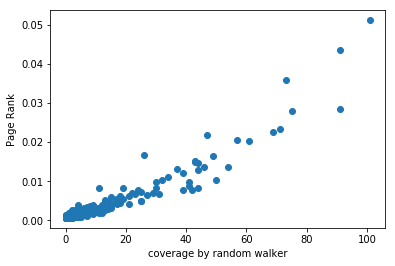

In [30]:
axes = plt.gca()
plt.plot(covAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('coverage by random walker')
plt.savefig("prVSrw.pdf")
plt.show()

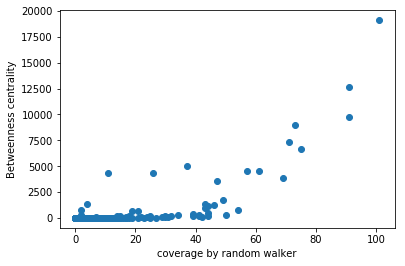

In [31]:
axes = plt.gca()
plt.plot(covAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('coverage by random walker')
plt.savefig('bcVScovrw.pdf')
plt.show()

[171 203  76 104  87 293  93  20 140  22 171 121 290  91 117 450 191 129]
[0.17494779 0.19971572 0.10393828 0.16292826 0.16649707 0.22668449
 0.24304103 0.469936   0.23016001 0.1917321  0.18862926 0.21821667
 0.23509145 0.34025339 0.21378433 0.15536274 0.17112429 0.30007107]


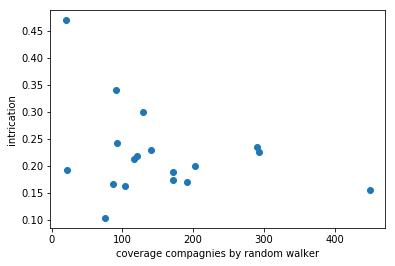

In [32]:
print(covCompagnies)
print(vectp)
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
plt.show()


- the first time to reach

In [33]:
ftrAirports=np.array([0 for i in range(len(airportl))])
ftrCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,collect="firstTimeToReach",boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    ftrAirports=np.add(covAirports,airports)
    ftrCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


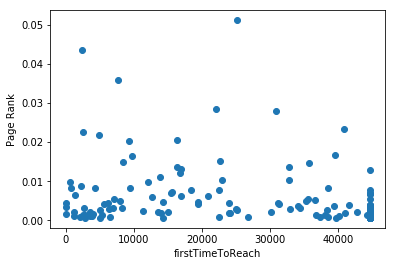

In [34]:
axes = plt.gca()
plt.plot(ftrAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('firstTimeToReach')
plt.show()

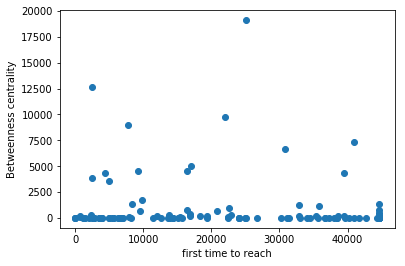

In [35]:
axes = plt.gca()
plt.plot(ftrAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('first time to reach')
plt.show()

In [36]:
nnodes=[121,102,70,68,145,101,90,120,18,134,43,95,239,108,85,103,87]
nlinks=[488,721,326,362,834,368,522,614,62,419,366,325,1358,715,1378,335,661]

['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']


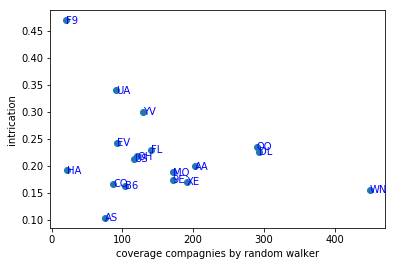

In [37]:
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(carL)
ni=0
for i in carL:
    text = axes.text(covCompagnies[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()


In [39]:
cov2=[covCompagnies[i]/nnodes[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(cov2)
ni=0
for i in carL:
    text = axes.text(cov2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

IndexError: list index out of range

In [40]:
cov3=[-covCompagnies[i]/nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('- coverage compagnies by random walker divided by number of links in the compagny')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

IndexError: list index out of range

In [ ]:
nlinks2=[nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nlinks2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('number of links')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nlinks2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Covariance

[ 0.19019685  0.07627009 -0.0107347   0.03319548  0.04627495  0.33221475
  0.12162779 -0.05351077  0.04525019  0.00770829  0.09136927  0.12366894
  0.11458389 -0.02205089 -0.0922131  -0.87585615  0.10517555  0.02391481]


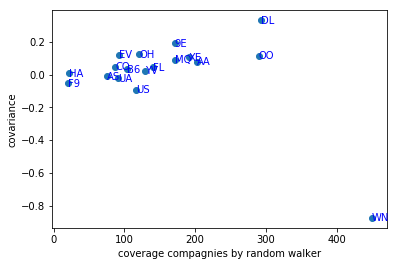

In [41]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpcov,'o')
axes.set_ylabel('covariance')
axes.set_xlabel('coverage compagnies by random walker')
print(vectpcov)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpcov[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Precision

[171, 203, 76, 104, 87, 293, 93, 20, 140, 22, 171, 121, 290, 91, 117, 450, 191, 129]


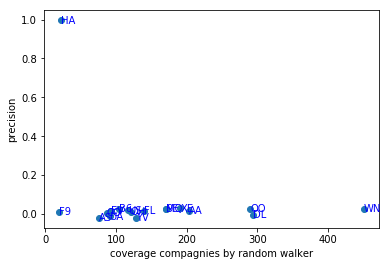

In [42]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpprec,'o')
axes.set_ylabel('precision')
axes.set_xlabel('coverage compagnies by random walker')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpprec[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

# Probas de transition

L'idée est de calculer, une fois arrivé à un aéroport $a$ à un temps $t_0$, la probabilité de prendre les vols à suivre en fonction du temps qu'il faut attendre pour cela. On considère qu'on peut prendre un lien qu'un certain temps après le temps $t2$ étudié, dans ce qu'on appellera une fenêtre. On va favoriser les vols partant le plus tôt. La probabilité de prendre un vol partant pour $b$ à $t$ sera donc: $p((t,a,b))=(t2-t)/c \times \delta_{t0<t<t2}$, avec $\sum_{\forall (t,a,b)\in E} p((t,a,b))=1$.

En calculant cela pour tous les aéroports de départ, nous obtenons une matrice d'adjacence entre les aéroports. Nous pouvons donc en tirer un vecteur propre pour la valeur propre 1, et un classement des aéroports les plus "influents", ceux dans lesquels il est le plus probable qu'un voyageur aléatoire atterrisse.


In [43]:
pt1,pt2=m.calculMatriceProbaTransition(7*60,60*24)
#m.printMS()
print(pt1)
matAirp=np.array(pt1)
matAirp=np.transpose(matAirp)
print(len(pt1))
valptrans,vectptrans=valeurPropreMax(matAirp,100000)
print(vectptrans)

v,vect=np.linalg.eig(matAirp)
print(sorted(v))

['EV']
6
['EV']
6
['XE']
16
['9E']
0
['9E']
0
['FL']
8
['OO']
12
['YV']
17
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['DL']
5
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['WN']
15
['WN']
15
['WN']
15
['UA']
13
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['MQ']
10
['MQ']
10
['WN']
15
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['EV']
6
['EV']
6
['OO']
12
['OO']
12
['OO']
12
[

['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['DL']
5
['DL']
5
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['OO']
12
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['OH']
11
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['DL']
5
['DL']
5
['EV']
6
['EV']
6
['WN']
15
['B6']
3
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['F9']
7
['F9']
7
['F9']
7
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['YV']
17
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['WN']
15
['WN']
15
['CO']
4
['CO']
4
['CO']
4
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['WN']
15
[

['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['FL']
8
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['FL']
8
['FL']
8
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['FL'

['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['EV']
6
['EV']
6
['EV']
6
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['XE']
16
['XE']
16
['AA']
1
['AA']
1
['MQ']
10
['9E']
0
['OH']
11
['OH']
11
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['OH']
11
['OO']
12
['YV']
17
['FL']
8
['MQ']
10
['MQ']
10
['MQ']
10
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['OH']
11
['US']
14
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OH']
11
['OH']
11
['OH']
11
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['OH']
11
['OH']
11
['OH']
11
['F9']
7
['F9']
7
['F9']
7
['UA']
13
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['US']
14
['US']
14
['US']
14
['CO']
4
['CO']
4
['CO']
4
['CO']
4

1
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['OO']
12
['UA']
13
['UA']
13
['UA']
13
['AA']
1
['AA']
1
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['US']
14
['US']
14
['US']
14
['US']
14
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['US']
14
['US']
14
['US']
14
['US']
14
['MQ']
10
['MQ']
10
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10


['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['OO']
12
['OO']
12
['OO']
12
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['AA']
1
['AA']
1
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['YV']
17
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['US']
14
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['B6']
3
['WN']
15
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['WN']
15
['F

16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['XE']
16
['9E']
0
['9E']
0
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['AA']
1
['AA']
1
['AA']
1
['CO']
4
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['DL']
5
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['CO']
4
['AA']

9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['HA']
9
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['AA']
1
['DL']
5
['UA']
13
['UA']
13
['HA']
9
['HA']
9
['US']
14
['US']
14
['AS']
2
['UA']
13
['UA']
13
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['US']
14
['WN']
15
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['CO']
4
['CO']
4
['CO']
4
['WN']
15
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['US']
14
['F9']
7
['F9']


['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['9E']
0
['MQ']
10
['MQ']
10
['XE']
16
['XE']
16
['XE']
16
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['MQ']
10
['MQ']
10
['MQ']
10
['9E']
0
['9E']
0
['XE']
16
['XE']
16
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['EV']
6
['EV']
6
['M

5
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['DL']
5
['YV']
17
['YV']
17
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['DL']
5
['OH']
11
['OH']
11
['OH']
11
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['DL']
5
['9E']
0
['DL']
5
['9E']
0
['9E']
0
['9E']
0
['DL']
5
['DL']
5
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['AA']
1
['AA']
1
['AA']
1
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['9E']
0
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['MQ']
10
['MQ']
10
['MQ']
10
['9E']
0
['9E']
0
['9E']
0
['MQ']
10
['MQ']
10
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['9E']
0
['DL']
5
['DL']
5
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
[

5
['XE']
16
['XE']
16
['YV']
17
['YV']
17
['MQ']
10
['CO']
4
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['HA']
9
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AS']
2
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15

['US']
14
['OH']
11
['US']
14
['US']
14
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['B6']
3
['B6']
3
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['FL']
8
['FL']
8
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['AA']
1
['AA']
1
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AS']
2
['DL']
5
['DL']
5
['DL']
5
['WN']
15
['AS']
2
['AS']
2
['AS']
2
['F9']
7
['F9']
7
['F9']
7
['F9']
7
['OO']
12
['OO']
12
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['CO']
4
['CO']
4
['WN']
15
['WN']
15
['DL']
5
['HA']
9
['UA']
13
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['B6']
3
['DL']
5
['AS']
2
['AS']
2
['AS']
2
['WN']
15
['WN']
15
['

['AS']
2
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['DL']
5
['AA']
1
['AS']
2
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['9E']
0
['9E']
0
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['US']
14
['US']
14
['US']
14
['US']
14
['9E']
0
['DL']
5
['DL']
5
['OH']
11
['WN']
15
['WN']
15
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['UA']
13
['UA']
13
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['9E']
0
['EV']
6
['FL']
8
['FL']
8
['US']
14
['9E']
0
['9E']
0
['9E']
0
['YV']
17
['YV']
17
['YV']
17
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['OH']
11
['OH']
11
['OH']
11
['B6']
3
['OO']
12
['OO']
12
['XE']
16
['XE']
16
['XE']
16
['YV']
17
[

6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['YV']
17
['OH']
11
['OO']
12
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['OH']
11
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OH']
11
['OH']
11
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['CO']
4
['CO']
4
['CO']
4
['AS']
2
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['AS']
2
['WN']
15
['WN']
15
['AS']
2
['B6']
3
['AS']
2
['AS']
2
['AS']
2
['CO']
4
['US']
14
['US']
14
['US']
14
['DL']
5
['DL']
5
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['F9']
7
['F9']
7
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AS']
2
['AS']
2
['DL']
5
['DL']
5
['DL']

['DL']
5
['DL']
5
['DL']
5
['DL']
5
['F9']
7
['F9']
7
['F9']
7
['F9']
7
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['UA']
13
['UA']
13
['UA']
13
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['MQ']


[7.44804256e-27 6.47289281e-27 8.65301226e-26 9.66558305e-28
 8.16784998e-27 3.02600413e-27 3.62302195e-03 1.02493153e-27
 8.13300345e-27 4.44962383e-27 2.65744628e-26 1.01937390e-27
 1.63446630e-26 2.89153697e-26 2.20709328e-26 8.30766334e-25
 1.18519862e-26 9.96629950e-26 1.13505069e-26 3.83216623e-27
 6.52076332e-27 5.62829608e-26 1.15821395e-27 7.38972216e-27
 7.70402336e-28 3.70934089e-27 4.82007069e-26 1.13142985e-26
 7.48475473e-27 3.62302195e-03 3.62302195e-03 9.03567369e-27
 1.34243235e-25 3.20046681e-26 2.44882693e-25 1.68309206e-27
 5.02551004e-27 6.76045346e-27 3.62302195e-03 1.84973738e-27
 1.93052483e-26 1.33204101e-26 5.92506601e-26 6.72285359e-26
 2.50850169e-25 1.40196519e-26 1.74989973e-26 1.80205085e-26
 2.25124625e-27 9.65006094e-28 2.14384474e-27 7.04405028e-27
 1.72688945e-27 2.67143237e-26 3.27869263e-27 1.64345978e-26
 3.98053340e-27 1.18338537e-25 3.12171665e-27 2.93972661e-25
 6.36644016e-26 4.21153061e-27 2.98736471e-27 3.64161021e-26
 4.99889919e-27 1.877509

In [44]:
print(valptrans)

1.0


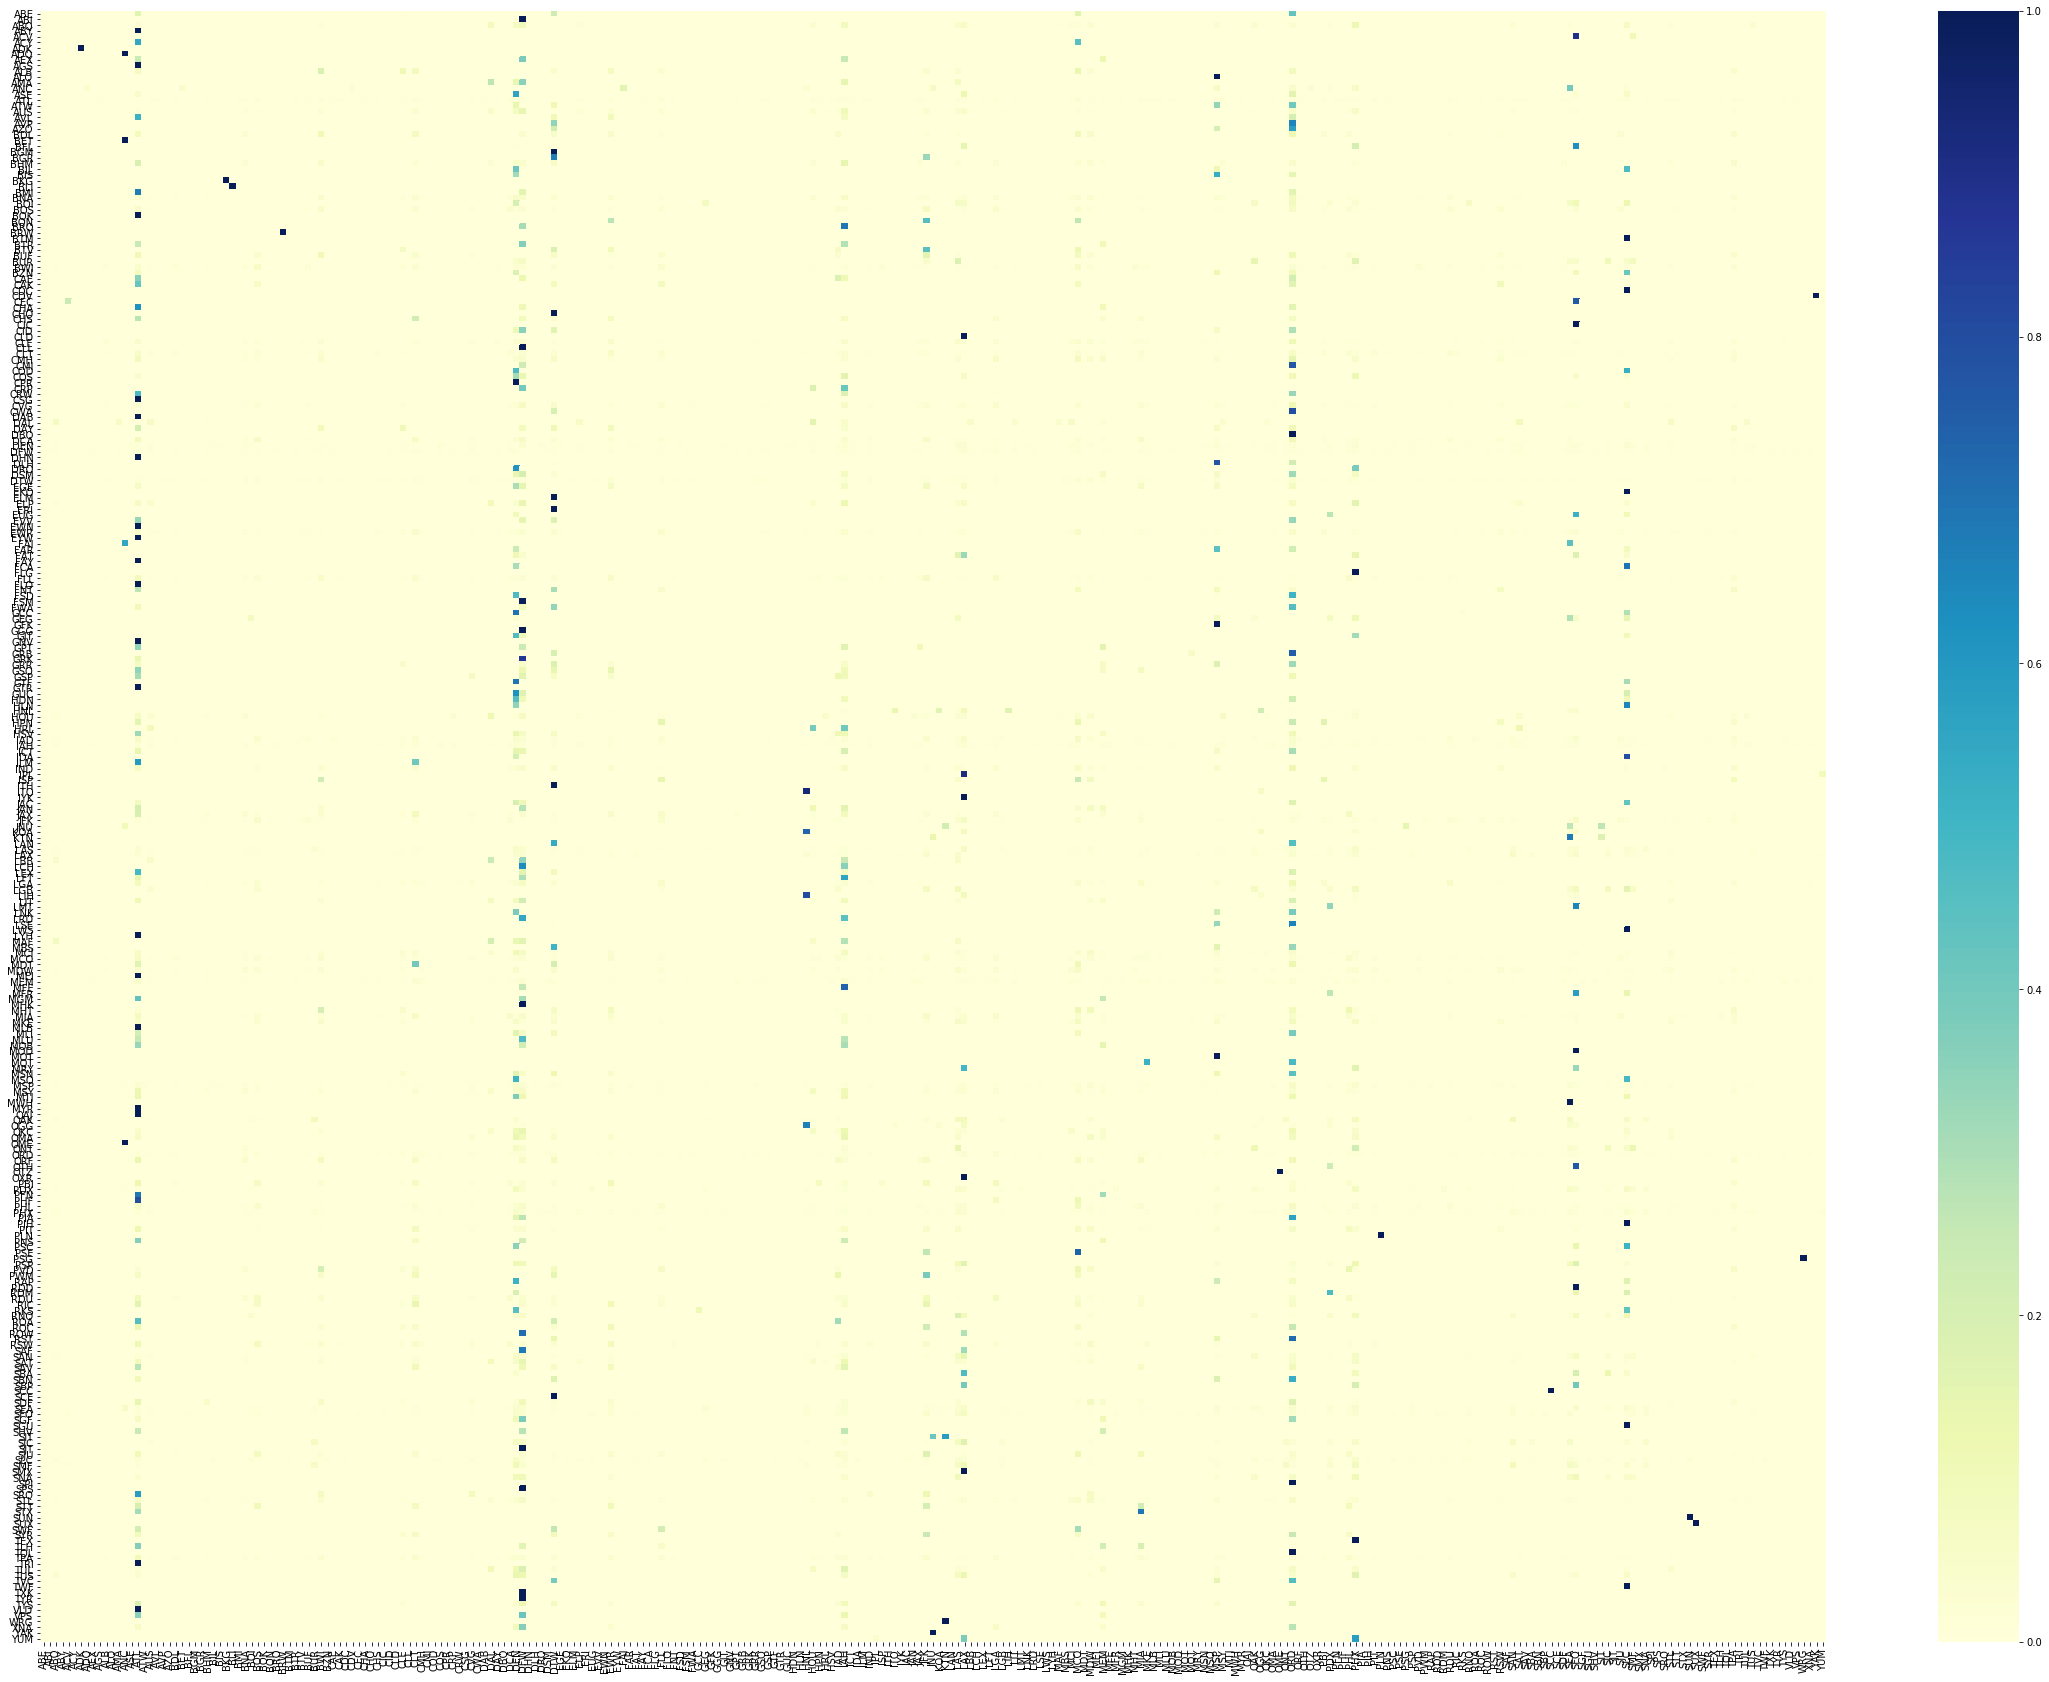

In [45]:
sns_plot=sns.heatmap(np.transpose(matAirp),cmap="YlGnBu",xticklabels=airportl,yticklabels=airportl)
fig = sns_plot.get_figure()
fig.set_size_inches(40,30)
plt.show()

Comparaison avec le Random walk. Ca marche quand le temps est très grand (1 jour)

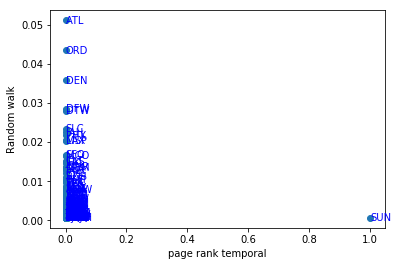

In [46]:
axes = plt.gca()
plt.plot(vectptrans,pr,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
ni=0
for i in airportl:
    text = axes.text(vectptrans[ni],pr[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

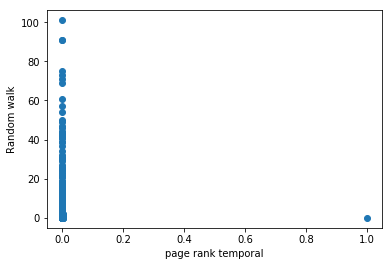

In [47]:
axes = plt.gca()
plt.plot(vectptrans,covAirports,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
plt.show()

A partir de ça, on va calculer une autre matrice de covariance. On a plein d'échantillons dans pt2. et on peut encore en faire plus sur le temps si on veut.


1.4997752106005988
0.5887094925098738
0.9040107689475142
0.4881159824250584
0.23974298971162766
0.7074938477230218
1.9912167634109261
0.049832177447690425
0.4393366014013199
0.2044740771591497
2.3034866037059816
0.26181194053165585
3.4883628493585213
0.32342376899447955
0.35227914084950307
1.5346229729986411
0.9180503757446089
0.9945879481008927
0.5887094925098738
0.24691817901027716
0.3662893259194576
0.19798427180074588
0.09845732683172959
0.28868828066057406
0.8040756938240352
0.0203364881197908
0.1779480159182721
0.08303515574865847
0.9311592711246386
0.10600890191918376
1.4118696268891027
0.1324402463947878
0.14385868661510454
0.6250111905068273
0.3720705302248065
0.4026473779345551
0.9040107689475142
0.3662893259194576
0.6080557982597355
0.30289176715376354
0.1494133984865777
0.4389357518432462
1.2351417478488032
0.03103128145399057
0.27238608593082847
0.12749635683580027
1.4277354713112522
0.16231825898009375
2.166590371870351
0.20129191182908104
0.21922358716433324
0.9549633550

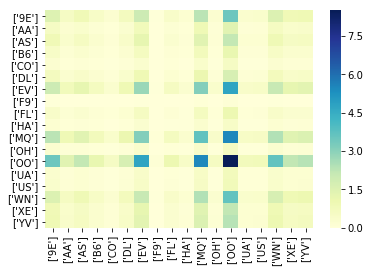

[0.23799015 0.23830125 0.23284586 0.2338402  0.2355127  0.23925538
 0.23807399 0.23127103 0.23510104 0.21874347 0.23892319 0.23081819
 0.23930988 0.23844773 0.23709905 0.23908776 0.23902805 0.23807036]
[0.23799015 0.23830125 0.23284586 0.2338402  0.2355127  0.23925538
 0.23807399 0.23127103 0.23510104 0.21874347 0.23892319 0.23081819
 0.23930988 0.23844773 0.23709905 0.23908776 0.23902805 0.23807036]


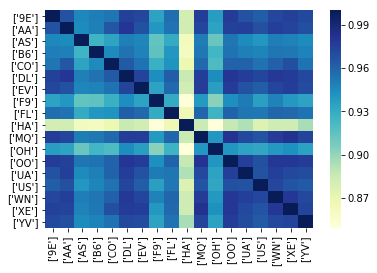

In [54]:
from math import *

matcovtemp=[[0 for j in carL] for i in carL]
avg=[0. for i in carL]

for i in range(len(carL)):
    moy=0
    for k in range(len(airportl)):
        moy+=pt2[k][i]
    avg[i]=moy/(len(carL))

for i in range(len(carL)):
    for j in range(len(carL)):
        moyprod=0
        moyi=0
        moyj=0
        for k in range(len(airportl)):
            moyprod+=(pt2[k][i]-avg[i])*(pt2[k][j]-avg[j])
        print(moyprod/(len(airportl)))
        matcovtemp[i][j]=(moyprod)/(len(pt2))

lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
plt.show()

for i in range(len(carL)):
    for j in range(len(carL)):
        if i!=j:
            matcovtemp[i][j]=matcovtemp[i][j]/(sqrt(matcovtemp[i][i])*sqrt(matcovtemp[j][j]))
for i in range(len(carL)):
    matcovtemp[i][i]=1


sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)

vecptransC=[0 for i in carL]
for i in range(len(vecptransC)):
    for j in range(len(vecptransC)):
        vecptransC[i]+=matcovtemp[i][j]

vecptransC=valeurPropreMax(matcovtemp,1000)[1]
print(vecptransC)

print(vecptransC)

[171, 203, 76, 104, 87, 293, 93, 20, 140, 22, 171, 121, 290, 91, 117, 450, 191, 129]


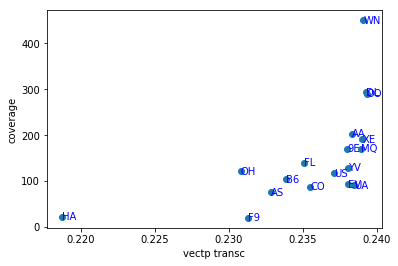

In [55]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(vecptransC,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('vectp transc')
print(cov3)
ni=0
for i in carL:
    text = axes.text(vecptransC[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

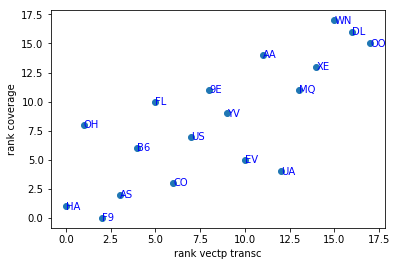

In [56]:
vecptransordo=sorted(vecptransC)
cov3ordo=sorted(cov3)
ordrevecptrans=[vecptransordo.index(vecptransC[i]) for i in range(len(vecptransC))]
ordrecov3=[cov3ordo.index(cov3[i]) for i in range(len(cov3))]
plt.plot(ordrevecptrans,ordrecov3,'o')
axes=plt.gca()
axes.set_ylabel('rank coverage')
axes.set_xlabel('rank vectp transc')
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[[0.77399381]] [1.86549708]


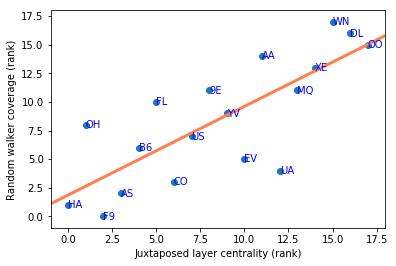

0.7621379254201905


In [65]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: training data

X = ordrevecptrans
Y = ordrecov3

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: define and train a model

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)

#----------------------------------------------------------------------------------------#
# Step 3: prediction

x_new_min = -1.0
x_new_max = 18.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)


plt.xlim(-1,18)
plt.ylim(-1,18)

#plt.title("Simple Linear Regression using scikit-learn and python 3",fontsize=10)
plt.xlabel('Juxtaposed layer centrality (rank)')
plt.ylabel('Random walker coverage (rank)')

axes=plt.gca()
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1

plt.savefig("simple_linear_regression2010.pdf", bbox_inches='tight')
plt.show()

#step 4 score 

s=0
for i in range(len(X)):
    s=s+(Y[i]-X[i]*model.coef_-model.intercept_)**2

print(sqrt(s)/(len(X)))

# Nombre de vols par compagnies

[171, 203, 76, 104, 87, 293, 93, 20, 140, 22, 171, 121, 290, 91, 117, 450, 191, 129]


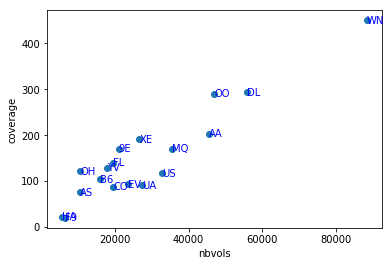

In [53]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nbvols,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('nbvols')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nbvols[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[21029, 45443, 10447, 16016, 19551, 55883, 23450, 6440, 19609, 5731, 35408, 10630, 46919, 27314, 32776, 88327, 26644, 17859]
['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']
509476


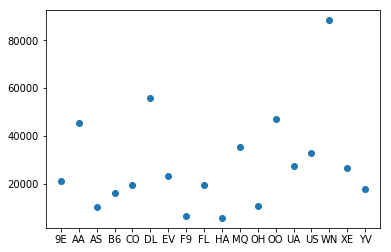

In [52]:
nbvols=[0 for i in carL]

for link in m.giveLinks().giveListOfLinks():
    nbVols=(len(link.giveIntervals()))
    carIndex=carL.index(link.giveLabel()[2][0])
    nbvols[carIndex]=nbvols[carIndex]+nbVols

print(nbvols)
print(carL)
tot=0
for i in range(len(nbvols)):
    tot=tot+nbvols[i]
print(tot)
plt.plot(carL,nbvols,'o')
plt.show()